We had to include the varriables here because our last stored varribles saved over these varribles that had the same name. This plot seems to be converging around .18 but is still rising indicating it has not found a the proper value to converge on (equlibrium).

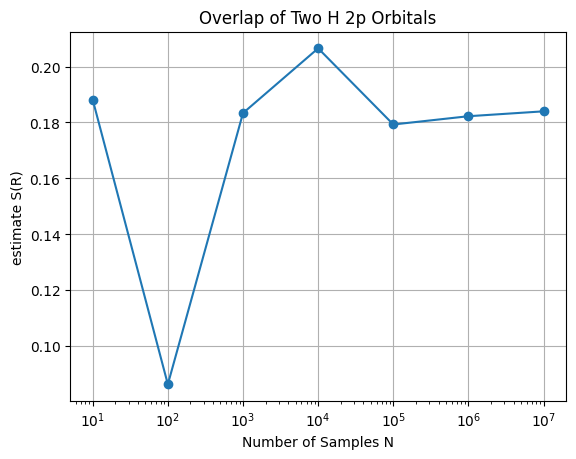

In [1]:
from monte_carlo_work import S_R, psi_2p_z
import matplotlib.pyplot as plt
import numpy as np

#carrying over the math from the python to have correct varriables
np.random.seed(42)
a = 0
b = 20 
R = 2
N = [10,100,1000,10000,100000, 1000000, 10000000]
ave = []
S_R = []
V = 2*(b)**3
for n in N:
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(a, b, n)
    z = np.random.uniform(a, b, n)
    intergrand= psi_2p_z(x, y, z + R/2) * psi_2p_z(x, y, z -R/2)
    intergral = np.average(intergrand)*V
    S_R.append(intergral)
    
#plot S_R random sampling 
plt.plot(N, S_R, 'o-')
plt.xscale('log')
plt.xlabel('Number of Samples N')
plt.ylabel('estimate S(R)')
plt.title('Overlap of Two H 2p Orbitals')
plt.grid(True)
plt.show()

showing the wave function and finding the proper function from scipy stats (gamma) that models this wave function. Then finding the proper shape of the gamma function needed to generate our importance sampling by overlaying graphs. 

We only need to worry about one side of the function becasue it is symentrical around the y=0 axis both forward and back. So we worried about the postive region

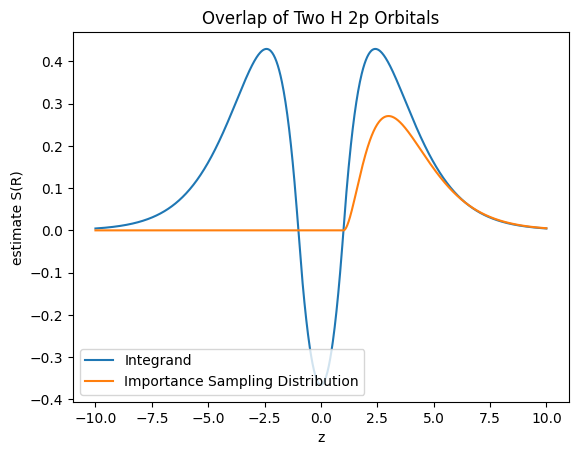

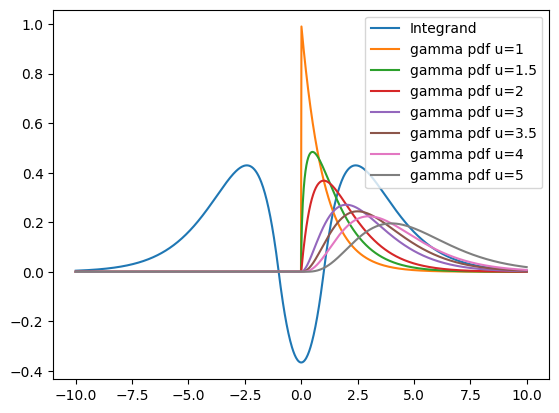

In [2]:
import scipy.stats as st
from monte_carlo_work import intergrand, importance_sampling, psi_2p_z, R
import matplotlib.pyplot as plt
import numpy as np

# importance sampling (generate and find which function and shape to use)
x = 0
y = 0
z = np.linspace(-10,10,1000) # two identical, so only worry about one side for importatance sampling
intergrand= psi_2p_z(x, y, z + R/2) * psi_2p_z(x, y, z -R/2)*100 #scale it up to show up on plot
importance_sampling = st.gamma.pdf(z,3,1)

# graph the intergrand and importantce intergral
plt.plot(z, intergrand, label='Integrand')
plt.plot(z, importance_sampling, label='Importance Sampling Distribution')
plt.xlabel('z')
plt.ylabel('estimate S(R)')
plt.title('Overlap of Two H 2p Orbitals')
plt.legend()
plt.show()

# check my u values and updated for shape of imporantce sampling
plt.plot(z, intergrand, label='Integrand')
for u in [1, 1.5, 2, 3, 3.5, 4, 5]:
    plt.plot(z, st.gamma.pdf(z, u, scale=1), label=f'gamma pdf u={u}')
plt.legend()
plt.show()

The importance sampling shows a lot less variation but it still does not seem to have fully settled. As it is still bouncing between .09 and .095. Where the equalibrium is.

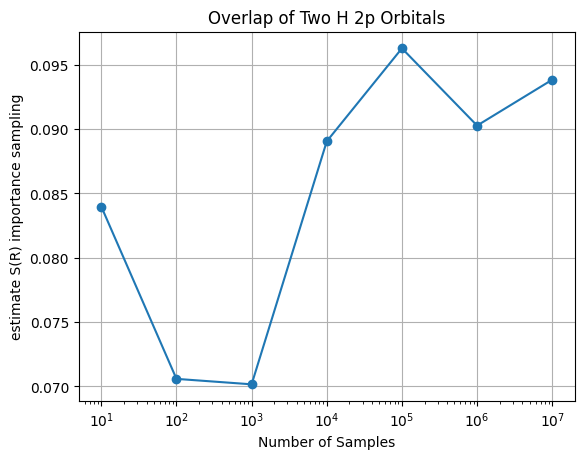

In [3]:
from monte_carlo_work import N, S_R2
import matplotlib.pyplot as plt

# plot estimate of S_R using importance sampling
plt.plot(N, S_R2, 'o-')
plt.xscale('log')
plt.xlabel('Number of Samples')
plt.ylabel('estimate S(R) importance sampling')
plt.title('Overlap of Two H 2p Orbitals')
plt.grid(True)
plt.show()

We overlayed the random sampling and importance sampling on one graph, we showed that pattern is slightly similar by eye, but the varraiance is far greater on the random sampling. The random sampling convergeces at a much higher point then the importance sampling

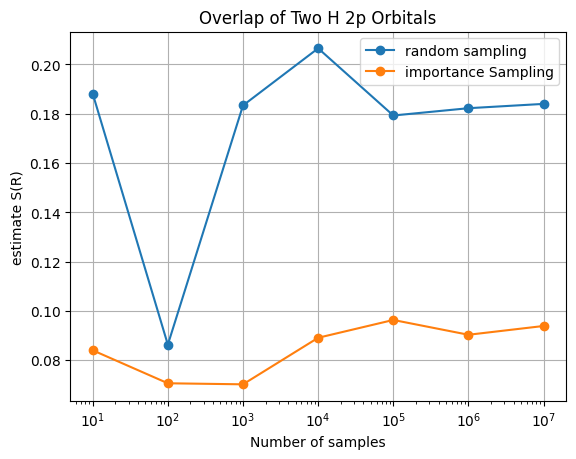

In [4]:
from monte_carlo_work import N, S_R2, S_R, psi_2p_z
import matplotlib.pyplot as plt
import numpy as np

# make sure my S_R value is correct
np.random.seed(42)
a = 0
b = 20 
R = 2
N = [10,100,1000,10000,100000, 1000000, 10000000]
ave = []
S_R = []
V = 2*(b)**3
for n in N:
    x = np.random.uniform(a, b, n)
    y = np.random.uniform(a, b, n)
    z = np.random.uniform(a, b, n)
    intergrand= psi_2p_z(x, y, z + R/2) * psi_2p_z(x, y, z -R/2)
    intergral = np.average(intergrand)*V
    S_R.append(intergral)

#comparision plot importance sampling (S_R2) vs random sampling (S_R) 
plt.plot(N, S_R, 'o-', label='random sampling')
plt.plot(N, S_R2, 'o-', label='importance Sampling')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('estimate S(R)')
plt.title('Overlap of Two H 2p Orbitals')
plt.legend()
plt.grid(True)
plt.show()


We see the number of estimates increases greatly 100 indicating more interations between the two orbitals. And even goes negative showing repulsion when the orbitials get too close, then going back to equilibrium

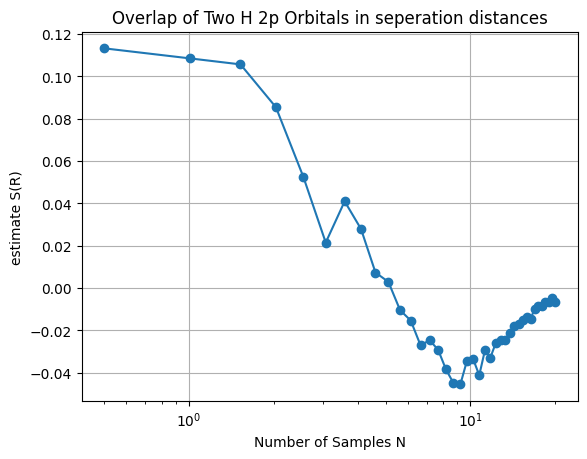

In [5]:
from monte_carlo_work import r, S_R3
import matplotlib.pyplot as plt

# plot S_R as seperation distances
plt.plot(r, S_R3, 'o-')
plt.xscale('log')
plt.xlabel('Number of Samples N')
plt.ylabel('estimate S(R)')
plt.title('Overlap of Two H 2p Orbitals in seperation distances')
plt.grid(True)
plt.show()